# Mooring Export -> Excel (each column/page is an instrument)

In [115]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'

d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='datasets_Mooring_19bsm2a_preliminary'

d.variables =  [
 'timeseries_id',
 'temperature',
 'depth',
 'time',
 # 'Instrument_Identifier'
]


In [116]:
df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
).dropna()

df.columns = [x[1].split()[0] for x in enumerate(df.columns)]


In [117]:
df

,timeseries_id,temperature,depth
time (UTC),,,
2018-03-01 22:47:33+00:00,19bsm2a_sc_0006m.unqcd,16.5362,6.0
2018-03-31 00:00:04+00:00,19bsm2a_sc_0006m.unqcd,13.5233,6.0
2018-03-31 01:00:04+00:00,19bsm2a_sc_0006m.unqcd,13.7307,6.0
2018-03-31 02:00:04+00:00,19bsm2a_sc_0006m.unqcd,13.8516,6.0
2018-03-31 03:00:04+00:00,19bsm2a_sc_0006m.unqcd,13.8603,6.0
...,...,...,...
2019-09-27 16:01:18+00:00,19bsm2a_s37_0060m.unqcd,8.7603,60.0
2019-09-27 17:01:18+00:00,19bsm2a_s37_0060m.unqcd,8.2483,60.0
2019-09-27 18:01:18+00:00,19bsm2a_s37_0060m.unqcd,8.6847,60.0


In [14]:
### for prawler export
df['samplenum'] = df.groupby('profile_id').cumcount()

dft = df.pivot(index='samplenum',columns='profile_id', values='Salinity (PSU)')

df.reset_index()

import openpyxl
with pd.ExcelWriter('19bs2c.xlsx') as writer:
    df.tz_localize(None).reset_index().pivot(index='samplenum',columns='profile_id', values='time (UTC)').to_excel(writer, sheet_name='Time')
    df.pivot(index='samplenum',columns='profile_id', values='Salinity (PSU)').to_excel(writer, sheet_name='Salinity')
    df.pivot(index='samplenum',columns='profile_id', values='depth (m)').to_excel(writer, sheet_name='depth')


KeyError: 'profile_id'

In [97]:
#all depths
import openpyxl
with pd.ExcelWriter('19bsm2a.xlsx') as writer:
    for instrument,dfg in df.groupby('timeseries_id'):
        dfg.tz_localize(None).to_excel(writer, sheet_name=instrument)

### Occasionally a filtered dataset is more appropriate so run the filter then export

In [118]:
import EcoFOCIpy.math.lanzcos as lanzcos #<- instrument specific

In [119]:
dfm= df.resample('1H').mean()
dfm['filt35hr'] = lanzcos.lanzcos(dfm['temperature'].values,1,35) + df['temperature'].mean()

<AxesSubplot:xlabel='time (UTC)'>

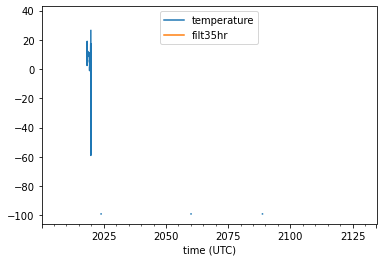

In [120]:
dfm[['temperature','filt35hr']].plot()
dfm['filt35hr'][(dfm.index.hour == 0) | (dfm.index.hour == 6) | (dfm.index.hour == 12) | (dfm.index.hour == 18)].plot(marker='.',markersize=.1)

In [111]:
import openpyxl
with pd.ExcelWriter('19bsm2a_f35.xlsx') as writer:
    for instrument,dfg in df.groupby('timeseries_id'):
        dfm= dfg.resample('1H').mean()
        dfm['filt35hr'] = lanzcos.lanzcos(dfm['temperature'].values,1,35) + df['temperature'].mean()
        dfm['filt35hr'][(dfm.index.hour == 0) | (dfm.index.hour == 6) | (dfm.index.hour == 12) | (dfm.index.hour == 18)].tz_localize(None).to_excel(writer, sheet_name=instrument)


In [121]:
import openpyxl
with pd.ExcelWriter('19bsm2a_f35_3hr.xlsx') as writer:
    for instrument,dfg in df.groupby('timeseries_id'):
        if instrument in ['19bsm2a_sc_0006m']:
            dfm= dfg.resample('1H').mean().interpolate()
            dfm['filt35hr'] = lanzcos.lanzcos(dfm['temperature'].values,1,35) + df['temperature'].mean()
            dfm['filt35hr'][(dfm.index.hour == 0) | (dfm.index.hour == 6) | (dfm.index.hour == 12) | (dfm.index.hour == 18)].tz_localize(None).to_excel(writer, sheet_name=instrument)


In [122]:
for instrument,dfg in df.groupby('timeseries_id'):
    print(instrument)

19bsm2a_s37_0012m.unqcd
19bsm2a_s37_0027m.unqcd
19bsm2a_s37_0050m.unqcd
19bsm2a_s37_0060m.unqcd
19bsm2a_s39_0015m.unqcd
19bsm2a_s39_0018m.unqcd
19bsm2a_s39_0021m.unqcd
19bsm2a_s39_0035m.unqcd
19bsm2a_s39_0039m.unqcd
19bsm2a_s56_0009m.unqcd
19bsm2a_s56_0047m.unqcd
19bsm2a_s56_0055m.unqcd
19bsm2a_sc_0006m.unqcd
19bsm2a_sc_0044m.unqcd
